In [1]:
# ===============================
# 01_data_exploration.ipynb
# ===============================

# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
# Cell 2: Load dataset
# Some CSVs contain unbalanced/embedded quotes which can raise a ParserError with the default C-engine.
# Use the python engine and skip bad lines to be more robust. If you prefer stricter parsing, revert to using your data_loader.
try:
	data = pd.read_csv('../data/sms_spam.csv', encoding='utf-8', engine='python', sep=',', on_bad_lines='skip')
except TypeError:
	# for older pandas versions that don't have on_bad_lines
	data = pd.read_csv('../data/sms_spam.csv', encoding='utf-8', engine='python', sep=',', error_bad_lines=False, warn_bad_lines=True)
except Exception:
	# fallback with loosening quoting rules
	import csv
	data = pd.read_csv('../data/sms_spam.csv', encoding='utf-8', engine='python', sep=',', quoting=csv.QUOTE_NONE, on_bad_lines='skip')

# print("✅ Data loaded successfully!")
# print(data.head())
# print(data.shape)


In [2]:
# print(f"\nDataset shape: {data.shape}")

# # Cell 3: Basic info
# print("\nData Info:")
# print(data.info())

# print("\nMissing Values:")
# print(data.isnull().sum())

# print("\nClass Distribution:")
# print(data['label'].value_counts())
# Cell 2: Load dataset
# Some CSVs contain unbalanced/embedded quotes which can raise a ParserError with the default C-engine.
# The SMS Spam dataset is often tab-separated with no header (label \t message). Try that first,
# and fall back to comma-separated parsing if needed. We set header=None and provide column names
# so we get consistent columns ('label', 'message') and avoid the KeyError: 'label'.
try:
    # Try reading as tab-separated (common format for this dataset) with no header
    data = pd.read_csv(
        '../data/sms_spam.csv',
        encoding='utf-8',
        engine='python',
        sep='\t',
        header=None,
        names=['label', 'message'],
        on_bad_lines='skip'
    )
except TypeError:
    # for older pandas versions that don't have on_bad_lines
    data = pd.read_csv(
        '../data/sms_spam.csv',
        encoding='utf-8',
        engine='python',
        sep='\t',
        header=None,
        names=['label', 'message'],
        error_bad_lines=False,
        warn_bad_lines=True
    )
except Exception:
    # fallback with loosening quoting rules and try comma-separated format as a fallback
    import csv
    try:
        data = pd.read_csv(
            '../data/sms_spam.csv',
            encoding='utf-8',
            engine='python',
            sep=',',
            header=None,
            names=['label', 'message'],
            quoting=csv.QUOTE_NONE,
            on_bad_lines='skip'
        )
    except TypeError:
        data = pd.read_csv(
            '../data/sms_spam.csv',
            encoding='utf-8',
            engine='python',
            sep=',',
            header=None,
            names=['label', 'message'],
            quoting=csv.QUOTE_NONE,
            error_bad_lines=False,
            warn_bad_lines=True
    )

C:\Users\DELL\AppData\Local\Temp\ipykernel_6096\727900641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='coolwarm')


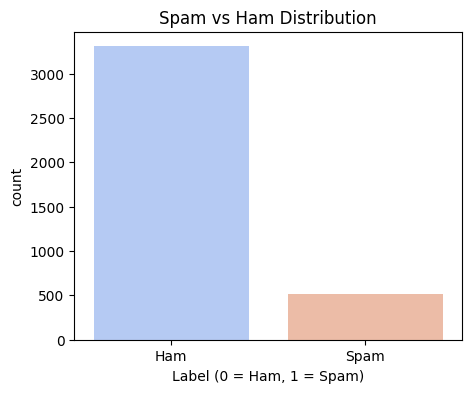

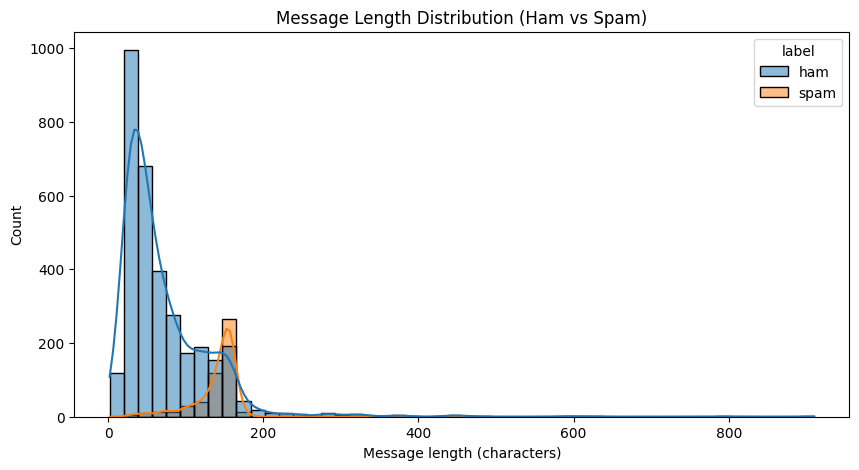


Sample cleaned messages:
     label                                            message  text_length
1545   ham                            me i dont know again oh           24
2227   ham  hey thk we juz go accordin to wat we discussed...          141
677    ham                            cause im not freaky lol           24
2427   ham                         how was txting and driving           26
3449   ham                           ugh just got outta class           24


In [3]:
# Cell 4: Visualize distribution
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=data, palette='coolwarm')
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()

# Cell 5: Text length feature
data['text_length'] = data['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=data, x='text_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution (Ham vs Spam)')
plt.xlabel('Message length (characters)')
plt.show()

# Cell 6: Simple cleaning preview
# - lowercase
# - remove non-letter characters (keep spaces)
# This is only a quick preview step; for production you might want more careful tokenization.
data_clean = data.copy()
data_clean['message'] = data_clean['message'].str.lower()
data_clean['message'] = data_clean['message'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
print("\nSample cleaned messages:")
print(data_clean.sample(5))
